In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
pd

<module 'pandas' from 'C:\\Users\\Tommy\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\pandas\\__init__.py'>

In [45]:
df_data = pd.read_csv('insurance.csv')
df_data = df_data.drop(labels=['region'],axis=1)
df_data = df_data.drop(labels=['children'],axis=1)
df_data 

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520
...,...,...,...,...,...
1333,50,male,30.970,no,10600.54830
1334,18,female,31.920,no,2205.98080
1335,18,female,36.850,no,1629.83350
1336,21,female,25.800,no,2007.94500


In [46]:
#transform catorical to quiantitive
labelMapSex= {'female':0, 'male':1}
labelMapSmoker= {'yes':1, 'no':0}

df_data['SexRevised'] = df_data['sex'].map(labelMapSex)
df_data['SmokerRevised'] = df_data['smoker'].map(labelMapSmoker)

In [47]:
df_data = df_data.drop(labels=['sex'],axis=1)
df_data = df_data.drop(labels=['smoker'],axis=1)

In [1]:
train=train.dropna()

NameError: name 'train' is not defined

In [48]:
df_data

,age,bmi,charges,SexRevised,SmokerRevised
0,19,27.900,16884.92400,0,1
1,18,33.770,1725.55230,1,0
2,28,33.000,4449.46200,1,0
3,33,22.705,21984.47061,1,0
4,32,28.880,3866.85520,1,0
...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0
1334,18,31.920,2205.98080,0,0
1335,18,36.850,1629.83350,0,0
1336,21,25.800,2007.94500,0,0


In [49]:
#切割訓練集與測試集
from sklearn.model_selection import train_test_split


x=df_data.drop(labels=['children','region'],axis=1)
y=df_data['charges']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3 , random_state=40) #test_size 表示7:3=train:test

KeyError: "['children', 'region'] not found in axis"

In [50]:
print('training data shape: ',x_train.shape)
print('testing data shape:',x_test.shape)
print('testing data shape: ',y_train.shape)

training data shape:  (936, 3)
testing data shape: (402, 3)
testing data shape:  (936,)


In [51]:
'''PCA
Parameters:
n_conponent: 指定降維後的特徵數目
whiten: 是否進行白化 true/false 白化是指對降維後的特徵做正規化，集方差都為1、平均值為0。默認值為false
random_state: 亂數種子，設定常數能夠保證每次PCA結果都一樣

Attributes:
explained_state: array 類型，降維後的各主成分的方差值，主成分方差越大，則說明這個成分越重要
explained_variance_ratio_: array類型，降維後的各主成分的方差值佔總方差值的比例，主成分所佔比例越大，則說明這個成分越重要
n_conponents: int類型，返回保留特徵個數

Methods:
fit(x,y): 把數據放入模型中訓練模型
fit_transform(x,[y])all: 訓練模型同時返回降維後的數據
transform(x): 對於訓練好的數據降維''' 


'PCA\nParameters:\nn_conponent: 指定降維後的特徵數目\nwhiten: 是否進行白化 true/false 白化是指對降維後的特徵做正規化，集方差都為1、平均值為0。默認值為false\nrandom_state: 亂數種子，設定常數能夠保證每次PCA結果都一樣\n\nAttributes:\nexplained_state: array 類型，降維後的各主成分的方差值，主成分方差越大，則說明這個成分越重要\nexplained_variance_ratio_: array類型，降維後的各主成分的方差值佔總方差值的比例，主成分所佔比例越大，則說明這個成分越重要\nn_conponents: int類型，返回保留特徵個數\n\nMethods:\nfit(x,y): 把數據放入模型中訓練模型\nfit_transform(x,[y])all: 訓練模型同時返回降維後的數據\ntransform(x): 對於訓練好的數據降維'

In [52]:
df_data

,age,bmi,charges,SexRevised,SmokerRevised
0,19,27.900,16884.92400,0,1
1,18,33.770,1725.55230,1,0
2,28,33.000,4449.46200,1,0
3,33,22.705,21984.47061,1,0
4,32,28.880,3866.85520,1,0
...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0
1334,18,31.920,2205.98080,0,0
1335,18,36.850,1629.83350,0,0
1336,21,25.800,2007.94500,0,0


In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, iterated_power=1)
train_reduced = pca.fit_transform(x_train)

print('PCA方差比:',pca.explained_variance_ratio_)
print('PCA方差值:',pca.explained_variance_)

PCA方差比: [9.99998587e-01 1.18760541e-06]
PCA方差值: [1.49945498e+08 1.78076336e+02]


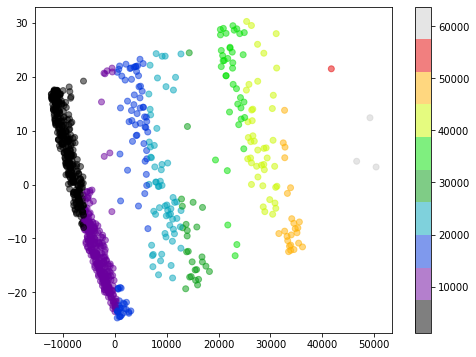

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:,0],train_reduced[:,1],c=y_train,alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar()
plt.show()

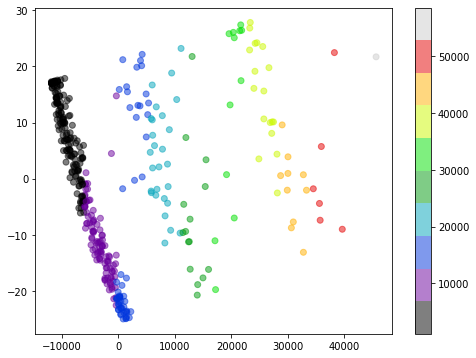

In [58]:
train_reduced = pca.fit_transform(x_test)
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:,0],train_reduced[:,1],c=y_test,alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar()
plt.show()

In [ ]:
'''t-SNE 使用更為複雜的公式來表達高維與低維之間的關係，且能夠允許非線性的轉換
Parameter:
    n_conponents: 指定t-SNE降維後的特徵維度數目
    n_tier: 設定迭代次數
    random_state: 亂數種子，設定常數能夠保證每次t-SNE結果都一樣

Attribute: 
    explained_variance_: array類型，降維後的各主成分的方差值，主成分方差值越大，說明這個主成分越重要
    explained_variance_ratio: array類型。降維後的各主成分的方差值佔總方差值的比例，主成分所佔比例越大，則說明這個主成分越重要
    n_components_: int類型，返回保留的特徵個數

Methods:
    fit(x,y): 把數據放入模型中訓練模型
    fit_teansform(x): 訓練模型同時返回降維後的數據
    transform(x): 對於續練好的數據降維

'''

In [64]:
from sklearn.manifold import TSNE

tsneModel = TSNE(n_components=2, random_state=42, n_iter=1000)
train_reduced= tsneModel.fit_transform(x_train)


C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


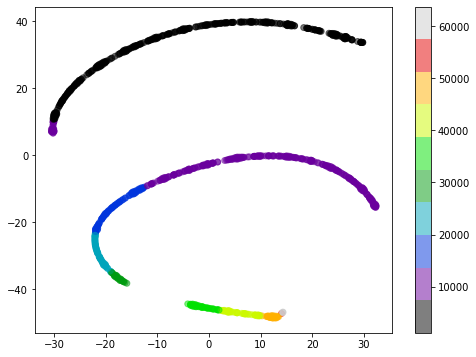

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:,0],train_reduced[:,1],c=y_train, alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar()
plt.show()

C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


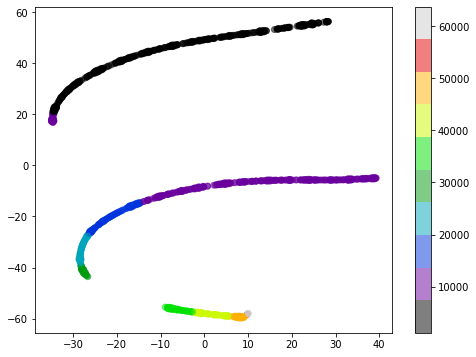

In [66]:
from sklearn.manifold import TSNE
 v
tsneModel = TSNE(n_components=2, random_state=42, n_iter=10000)
train_reduced= tsneModel.fit_transform(x_train)
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:,0],train_reduced[:,1],c=y_train, alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar()
plt.show()